 
---



---



---
# **Human Activity Recognition by Smartphone & Smartwatch Kinematic Sensors**


---


---

---



Data set source:  WISDM Lab of Frodham University, NY

available from the UCI Machine Learning Repository

https://archive.ics.uci.edu/ml/datasets/WISDM+Smartphone+and+Smartwatch+Activity+and+Biometrics+Dataset+

For the source files of the dataset and additional background - see there.

**REMARK:**
I have detected the following apparent errors in these source files of the dataset:

The following feature columns are suspected to contain erronreous values:

'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR'

The following files:

data_1611_accel_phone.arff - data_1617_accel_phone.arff

are all identical replicates on the file: data_1610_accel_phone.arff

---



### **Background summary on data collection method:**


---



Two kinds of devices:

1) Smartphone (Samsung Galaxy S5)

2) Smartwatch (LG G)

Two kinds of embedded kinematic sensors (for each device):

1) Accelerometer - for measurement of linear acceleration (m/sec^2)

**Remark:**

 It seems that the accelerometer doesn't, actually, measure the acceleration but rather the *force* exerted on it, calibrated per the mass of the device.
Hence, also while being in equilibrium state, (i.e. zero acceleration), the accelerometer outputs a vertical acceleration of 9.8 m/s^2, upwards.

2) Gyroscope - for measurement of angular velocity (rad/sec)



51 Participants

18 Physical Activities of daily living

*   Non hand oriented activities (leg):--->
{walking,
jogging, stairs, standing, kicking}
*   hand oriented activities:--->
{dribbling, playing catch, typing, writing, clapping,
brushing teeth, folding clothes}
*   Hand
oriented activities (eating):--->
{eating
pasta, eating soup, eating sandwich, eating
chips, drinking}

Each activity has been performed for the duration of 3 minutes

sensors sampling rate: 20 Hz (i.e. every 50 ms) - Only approximately - subject to OS constraints.

Number of raw measurements:  15,630,426

Device placement:

smartphone - placed in the participant's front right
pants leg pocket

smartwatch - wrapped on dominant hand

**Transformed, labeled, datasets:**


---


A sliding window approach is used to transform the time series data into a derived dataset of respective characterized, labeled data records, each of which describing a single time window data - window duration 10 sec (non overlapping)

Number of labled 10 sec window processed data records: 78,152 (51 x 3 x 60 x 20)

### Reference coordinate system definition:
---

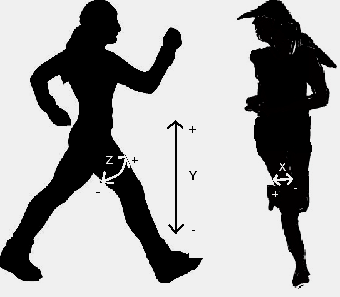

**Devices measurements reference axes (inferred from the raw data):**

---



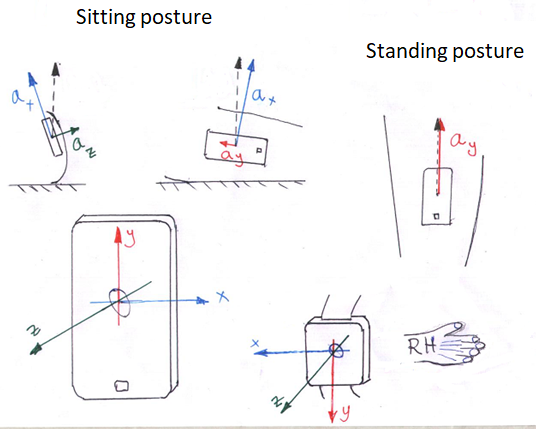

[](http://)/kaggle/input/smartphone-and-smartwatch-activity-and-biometrics/WISDM-dataset-description.pdf



---



---



---


<font size="4"> REMARK: This notebook is dedicated to analyzing mostly the Phone-Acceleration measurement Dataset (hence, it's suffix "PA")

It can be extended to analyze also the other measurement channels: Phone-Gyro, Watch-Acceleration, Watch-Gyro<font>


---



---



---



---
# **Exploratory Data Analysis of raw data (time series sensors data)**
---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [570]:
# activity_codes_mapping = {'A': 'walking',
#                           'B': 'jogging',
#                           'C': 'stairs',
#                           'D': 'sitting',
#                           'E': 'standing',
#                           'F': 'typing',
#                           'G': 'brushing teeth',
#                           'H': 'eating soup',
#                           'I': 'eating chips',
#                           'J': 'eating pasta',
#                           'K': 'drinking from cup',
#                           'L': 'eating sandwich',
#                           'M': 'kicking soccer ball',
#                           'O': 'playing catch tennis ball',
#                           'P': 'dribbling basket ball',
#                           'Q': 'writing',
#                           'R': 'clapping',
#                           'S': 'folding clothes'}

activity_codes_mapping = {'A': 'walking',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'J': 'eating',
                          'K': 'drinking',}

# activity_color_map = {activity_codes_mapping['A']: 'lime',
#                       activity_codes_mapping['B']: 'red',
#                       activity_codes_mapping['C']: 'blue',
#                       activity_codes_mapping['D']: 'orange',
#                       activity_codes_mapping['E']: 'yellow',
#                       activity_codes_mapping['F']: 'lightgreen',
#                       activity_codes_mapping['G']: 'greenyellow',
#                       activity_codes_mapping['H']: 'magenta',
#                       activity_codes_mapping['I']: 'gold',
#                       activity_codes_mapping['J']: 'cyan',
#                       activity_codes_mapping['K']: 'purple',
#                       activity_codes_mapping['L']: 'lightgreen',
#                       activity_codes_mapping['M']: 'violet',
#                       activity_codes_mapping['O']: 'limegreen',
#                       activity_codes_mapping['P']: 'deepskyblue',   
#                       activity_codes_mapping['Q']: 'mediumspringgreen',
#                       activity_codes_mapping['R']: 'plum',
#                       activity_codes_mapping['S']: 'olive'}

activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['E']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',}

                          



---


# **Exploration of raw data files:**


---



In [305]:
def show_accel_per_activity(device, df, act, interval_in_sec = None):
  ''' Plots acceleration time history per activity '''

  df1 = df.loc[df.activity == act].copy()
  df1.reset_index(drop = True, inplace = True)

  df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 # nanoseconds --> seconds

  if interval_in_sec == None:
    ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)
  else:
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)

  ax.set_xlabel('duration  (sec)', fontsize = 15)
  ax.set_ylabel('acceleration  (m/sec^2)',fontsize = 15)
  ax.set_title('Acceleration:   Device: ' + device + '      Activity:  ' + act, fontsize = 15)



In [306]:
def show_ang_velocity_per_activity(device, df, act, interval_in_sec = None):
  ''' Plots angular volocity time history per activity '''

  df1 = df.loc[df.activity == act].copy()
  df1.reset_index(drop = True, inplace = True)

  df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 # nanoseconds --> seconds

  if interval_in_sec == None:
    ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)
  else:
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)

  ax.set_xlabel('duration  (sec)', fontsize = 15)
  ax.set_ylabel('angular velocity  (rad/sec)',fontsize = 15)
  ax.set_title('Angular velocity:  Device: ' + device + '      Activity:  ' + act, fontsize = 15)





---



---



---


---
# **Construction of the Transformed, labeled dataset for the application of Machine Learning models:**
---


---



---



---



## **Features definition and Construction:**

In [307]:
features = ['ACTIVITY',
            'X0', # 1st bin fraction of x axis acceleration distribution
            'X1', # 2nd bin fraction ...
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', # 1st bin fraction of y axis acceleration distribution
            'Y1', # 2nd bin fraction ...
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', # 1st bin fraction of z axis acceleration distribution
            'Z1', # 2nd bin fraction ...
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', # average sensor value over the window (per axis)
            'YAVG',
            'ZAVG',
            'XPEAK', # Time in milliseconds between the peaks in the wave associated with most activities. heuristically determined (per axis)
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', # Average absolute difference between the each of the 200 readings and the mean of those values (per axis)
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', # Standard deviation of the 200 window's values (per axis)  ***BUG!***
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR', # Variance of the 200 window's values (per axis)   ***BUG!***
            'YVAR',
            'ZVAR',
            'XMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', # The cosine distances between sensor values for pairs of axes (three pairs of axes)
            'XZCOS',
            'YZCOS',
            'XYCOR', # The correlation between sensor values for pairs of axes (three pairs of axes)
            'XZCOR',
            'YZCOR',
            'RESULTANT', # Average resultant value, computed by squaring each matching x, y, and z value, summing them, taking the square root, and then averaging these values over the 200 readings
            'PARTICIPANT'] # Categirical: 1600 -1650

len(features)

93

In [693]:
import glob

#the duplicate files to be ignored; all identical to 1600
duplicate_files = [str(i) for i in range(1611, 1618)] # '1611',...'1617'

path = r'wisdm/wisdm-dataset/wisdm-dataset/arff_files/watch/accel'
all_files = glob.glob(path + "/*.arff")

list_dfs_phone_accel = []

for filename in all_files:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue #ignore the duplicate files
    df = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_phone_accel.append(df)

all_phone_accel = pd.concat(list_dfs_phone_accel, axis=0, ignore_index=True, sort=False)

all_phone_accel = all_phone_accel[all_phone_accel.iloc[:, 0].isin(['A', 'D', 'E', 'F', 'J', 'K'])]
all_phone_accel

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.00,0.000,0.010,0.050,0.230,0.185,0.125,0.160,0.120,...,0.511396,0.504824,-0.653107,-0.177665,0.047484,-0.128490,-0.172721,-0.044635,12.90690,1604
1,A,0.00,0.005,0.045,0.060,0.185,0.175,0.130,0.125,0.145,...,0.494735,0.488377,-0.650797,-0.147216,0.100347,-0.185259,-0.439753,0.170373,12.92930,1604
2,A,0.00,0.025,0.040,0.060,0.160,0.180,0.110,0.170,0.120,...,0.509960,0.503407,-0.620292,-0.136585,0.185728,-0.245739,-0.443186,0.280749,12.99140,1604
3,A,0.00,0.000,0.000,0.080,0.185,0.155,0.140,0.120,0.120,...,0.434896,0.429308,-0.634005,-0.277457,-0.013385,-0.081120,-0.215224,-0.210576,13.34430,1604
4,A,0.00,0.000,0.000,0.035,0.175,0.245,0.175,0.100,0.135,...,0.413204,0.407894,-0.660106,-0.167239,0.020139,-0.001829,-0.190008,-0.078624,12.91970,1604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,K,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.287650,0.283954,0.970449,0.320037,0.536923,-0.886916,-0.968035,0.959208,9.85425,1608
16142,K,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.266859,0.263430,0.950138,0.103545,0.292897,-0.903975,-0.568098,0.623870,9.84500,1608
16143,K,0.62,0.155,0.160,0.055,0.010,0.000,0.000,0.000,0.000,...,0.517949,0.511294,0.695925,0.159822,0.088311,0.291992,0.280011,0.382121,9.99836,1608
16144,K,0.84,0.045,0.010,0.095,0.010,0.000,0.000,0.000,0.000,...,0.454865,0.449020,0.865799,0.429432,0.162165,0.581008,0.773190,0.539199,9.86740,1608


In [573]:
all_phone_accel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4906 entries, 0 to 14468
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACTIVITY     4906 non-null   object 
 1   X0           4906 non-null   float64
 2   X1           4906 non-null   float64
 3   X2           4906 non-null   float64
 4   X3           4906 non-null   float64
 5   X4           4906 non-null   float64
 6   X5           4906 non-null   float64
 7   X6           4906 non-null   float64
 8   X7           4906 non-null   float64
 9   X8           4906 non-null   float64
 10  X9           4906 non-null   float64
 11  Y0           4906 non-null   float64
 12  Y1           4906 non-null   float64
 13  Y2           4906 non-null   float64
 14  Y3           4906 non-null   float64
 15  Y4           4906 non-null   float64
 16  Y5           4906 non-null   float64
 17  Y6           4906 non-null   float64
 18  Y7           4906 non-null   float64
 19  Y8        

In [574]:
all_phone_accel_breakpoint = all_phone_accel.copy()

In [575]:
all_phone_accel['ACTIVITY'].map(activity_codes_mapping).value_counts()

ACTIVITY
drinking    846
sitting     831
standing    826
walking     808
eating      803
typing      792
Name: count, dtype: int64

**The following columns:'XSTANDDEV',	'YSTANDDEV',	'ZSTANDDEV'	,'XVAR',	'YVAR',	'ZVAR' are suspected to contain erroneous data: ( e.g. absolute deviation is not of the same order of magnitude of standard deviation; variance is not the square of standard deviation !!!)**

In [576]:
all_phone_accel[['XABSOLDEV', 'YABSOLDEV','ZABSOLDEV','XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR']].head()

,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR
0,1.74002,1.84861,0.633124,0.147026,0.158576,0.055980,0.383439,0.398216,0.236601
1,1.78030,1.93992,0.716452,0.156840,0.169865,0.060764,0.396030,0.412147,0.246503
2,1.71826,1.69978,0.721070,0.146998,0.151455,0.062041,0.383403,0.389173,0.249080
3,1.65780,1.71486,0.733555,0.146851,0.149030,0.063762,0.383212,0.386044,0.252511
4,1.73369,1.50979,0.798650,0.153646,0.138565,0.067832,0.391978,0.372243,0.260446


**Therefore they will be dropped from the dataset**

In [577]:
all_phone_accel.drop(['XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1, inplace = True)



---



# **Preprocessing of Input Dataset:**

---



<font size=4>**Dropping the Participant column:**</font>

The approach in this analysis will be to see all the participants as a closed united sample population.
The purpose of this analysis is not to inquire the inter participant variability.
Also, the participants number (44 in effect) is too small to significantly represent the variability of the general population.

Therefore, The participant column will be dropped:

In [578]:
all_phone_accel.drop('PARTICIPANT', axis = 1, inplace = True)

<font size=4>**Allocating the test subset:**</font>

In [579]:
from sklearn.model_selection import train_test_split

y = all_phone_accel.ACTIVITY
X = all_phone_accel.drop('ACTIVITY', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.75, 
                                                    test_size = 0.25,
                                                    shuffle = True, 
                                                    stratify = all_phone_accel.ACTIVITY)

In [580]:
X_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
11107,0.000,0.415,0.565,0.020,0.000,0.000,0.0,0.0,0.0,0.0,...,-0.061972,-0.061250,-0.060463,-0.217131,-0.416132,-0.275892,-0.197990,-0.406745,-0.308332,0.562872
2373,0.050,0.485,0.395,0.060,0.005,0.005,0.0,0.0,0.0,0.0,...,0.393114,0.388538,0.383545,0.067698,0.240892,0.690895,0.067775,0.240874,0.693541,2.700810
8815,0.055,0.340,0.555,0.040,0.000,0.010,0.0,0.0,0.0,0.0,...,0.141281,0.139636,0.137842,0.084966,0.512328,0.297995,0.080500,0.518335,0.302838,1.152750
11371,0.000,0.430,0.570,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.020639,0.020399,0.020137,-0.708096,0.280955,-0.449254,-0.708784,0.281912,-0.449371,0.477634
11377,0.000,0.455,0.545,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.000471,0.000465,0.000459,-0.748710,0.123847,0.224557,-0.748810,0.123701,0.224577,0.449234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037,0.000,0.515,0.485,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,-0.074761,-0.073890,-0.072941,0.564228,-0.129438,-0.230904,0.565401,-0.131306,-0.230868,0.250637
10480,0.000,0.525,0.475,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.012528,0.012382,0.012223,-0.295256,0.567621,-0.494447,-0.291891,0.558063,-0.493657,0.491016
2120,0.000,0.510,0.490,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,-0.191273,-0.189046,-0.186617,-0.873017,0.194971,-0.317414,-0.874116,0.192734,-0.310680,0.282734
10798,0.000,0.635,0.365,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.007732,0.007642,0.007544,-0.085713,-0.204735,0.586320,-0.091133,-0.203866,0.605619,0.428881


In [581]:
y_train

11107    J
2373     A
8815     J
11371    F
11377    F
        ..
14037    F
10480    K
2120     E
10798    K
14271    A
Name: ACTIVITY, Length: 3679, dtype: object

In [582]:
X_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
486,0.000,0.440,0.560,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.068444,-0.067647,-0.066778,-0.288458,-0.228119,0.007191,-0.285438,-0.223682,-0.001432,0.330883
9049,0.000,0.455,0.545,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.504705,-0.498829,-0.492419,-0.442099,-0.149612,0.516377,-0.451372,-0.147837,0.527765,0.032266
7726,0.000,0.475,0.525,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.384700,-0.380222,-0.375336,0.054663,0.569351,-0.512745,0.042854,0.589032,-0.507373,0.038694
6339,0.035,0.535,0.425,0.005,0.000,0.0,0.0,0.0,0.0,0.0,...,0.351397,0.347306,0.342843,-0.294345,0.815048,-0.546071,-0.294716,0.824597,-0.548954,2.643920
8322,0.010,0.535,0.410,0.045,0.000,0.0,0.0,0.0,0.0,0.0,...,0.341191,0.337219,0.332885,0.051883,0.618715,0.310774,0.056916,0.618611,0.320588,2.270760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,0.000,0.600,0.400,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.571876,-0.565218,-0.557955,-0.254549,-0.165229,-0.059908,-0.216501,-0.172376,-0.060259,0.034252
5359,0.130,0.380,0.395,0.095,0.000,0.0,0.0,0.0,0.0,0.0,...,0.475573,0.470036,0.463996,0.112648,0.089001,0.501403,0.102124,0.099083,0.522433,3.455530
11357,0.010,0.465,0.495,0.025,0.005,0.0,0.0,0.0,0.0,0.0,...,0.102597,0.101403,0.100100,-0.279419,0.241447,-0.189047,-0.290215,0.241811,-0.190068,0.544728
7761,0.000,0.430,0.570,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.101050,0.099873,0.098590,-0.433429,-0.069850,0.528999,-0.433990,-0.069475,0.531009,0.486079


In [583]:
y_test

486      F
9049     E
7726     D
6339     A
8322     A
        ..
14337    D
5359     A
11357    E
7761     F
13111    J
Name: ACTIVITY, Length: 1227, dtype: object

**Observation: both train and test class labels sets are fairly balanced**

Temporarily re-unite the train lables to train dataset for further preprocessing steps.

In [584]:
X_train.insert(0, 'Y', y_train)
X_train

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
11107,J,0.000,0.415,0.565,0.020,0.000,0.000,0.0,0.0,0.0,...,-0.061972,-0.061250,-0.060463,-0.217131,-0.416132,-0.275892,-0.197990,-0.406745,-0.308332,0.562872
2373,A,0.050,0.485,0.395,0.060,0.005,0.005,0.0,0.0,0.0,...,0.393114,0.388538,0.383545,0.067698,0.240892,0.690895,0.067775,0.240874,0.693541,2.700810
8815,J,0.055,0.340,0.555,0.040,0.000,0.010,0.0,0.0,0.0,...,0.141281,0.139636,0.137842,0.084966,0.512328,0.297995,0.080500,0.518335,0.302838,1.152750
11371,F,0.000,0.430,0.570,0.000,0.000,0.000,0.0,0.0,0.0,...,0.020639,0.020399,0.020137,-0.708096,0.280955,-0.449254,-0.708784,0.281912,-0.449371,0.477634
11377,F,0.000,0.455,0.545,0.000,0.000,0.000,0.0,0.0,0.0,...,0.000471,0.000465,0.000459,-0.748710,0.123847,0.224557,-0.748810,0.123701,0.224577,0.449234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037,F,0.000,0.515,0.485,0.000,0.000,0.000,0.0,0.0,0.0,...,-0.074761,-0.073890,-0.072941,0.564228,-0.129438,-0.230904,0.565401,-0.131306,-0.230868,0.250637
10480,K,0.000,0.525,0.475,0.000,0.000,0.000,0.0,0.0,0.0,...,0.012528,0.012382,0.012223,-0.295256,0.567621,-0.494447,-0.291891,0.558063,-0.493657,0.491016
2120,E,0.000,0.510,0.490,0.000,0.000,0.000,0.0,0.0,0.0,...,-0.191273,-0.189046,-0.186617,-0.873017,0.194971,-0.317414,-0.874116,0.192734,-0.310680,0.282734
10798,K,0.000,0.635,0.365,0.000,0.000,0.000,0.0,0.0,0.0,...,0.007732,0.007642,0.007544,-0.085713,-0.204735,0.586320,-0.091133,-0.203866,0.605619,0.428881


In [585]:
X_train

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
11107,J,0.000,0.415,0.565,0.020,0.000,0.000,0.0,0.0,0.0,...,-0.061972,-0.061250,-0.060463,-0.217131,-0.416132,-0.275892,-0.197990,-0.406745,-0.308332,0.562872
2373,A,0.050,0.485,0.395,0.060,0.005,0.005,0.0,0.0,0.0,...,0.393114,0.388538,0.383545,0.067698,0.240892,0.690895,0.067775,0.240874,0.693541,2.700810
8815,J,0.055,0.340,0.555,0.040,0.000,0.010,0.0,0.0,0.0,...,0.141281,0.139636,0.137842,0.084966,0.512328,0.297995,0.080500,0.518335,0.302838,1.152750
11371,F,0.000,0.430,0.570,0.000,0.000,0.000,0.0,0.0,0.0,...,0.020639,0.020399,0.020137,-0.708096,0.280955,-0.449254,-0.708784,0.281912,-0.449371,0.477634
11377,F,0.000,0.455,0.545,0.000,0.000,0.000,0.0,0.0,0.0,...,0.000471,0.000465,0.000459,-0.748710,0.123847,0.224557,-0.748810,0.123701,0.224577,0.449234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037,F,0.000,0.515,0.485,0.000,0.000,0.000,0.0,0.0,0.0,...,-0.074761,-0.073890,-0.072941,0.564228,-0.129438,-0.230904,0.565401,-0.131306,-0.230868,0.250637
10480,K,0.000,0.525,0.475,0.000,0.000,0.000,0.0,0.0,0.0,...,0.012528,0.012382,0.012223,-0.295256,0.567621,-0.494447,-0.291891,0.558063,-0.493657,0.491016
2120,E,0.000,0.510,0.490,0.000,0.000,0.000,0.0,0.0,0.0,...,-0.191273,-0.189046,-0.186617,-0.873017,0.194971,-0.317414,-0.874116,0.192734,-0.310680,0.282734
10798,K,0.000,0.635,0.365,0.000,0.000,0.000,0.0,0.0,0.0,...,0.007732,0.007642,0.007544,-0.085713,-0.204735,0.586320,-0.091133,-0.203866,0.605619,0.428881


In [586]:
X_train.drop(['Y'], axis = 1, inplace = True)

# **Scaling:**

rescaling will now be applied to the features that their absolute values exceed the range of ~1

In [587]:
from sklearn.preprocessing import MaxAbsScaler

scaling_transformer = MaxAbsScaler().fit(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [588]:
X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

Applying this scaling on the test set as well:

In [589]:
X_test = X_test.copy()

In [590]:
X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [591]:
X_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
486,0.000,0.440,0.560,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.068444,-0.067647,-0.066778,-0.288458,-0.228119,0.007191,-0.285438,-0.223682,-0.001432,0.052248
9049,0.000,0.455,0.545,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.504705,-0.498829,-0.492419,-0.442099,-0.149612,0.516377,-0.451372,-0.147837,0.527765,0.005095
7726,0.000,0.475,0.525,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.384700,-0.380222,-0.375336,0.054663,0.569351,-0.512745,0.042854,0.589032,-0.507373,0.006110
6339,0.035,0.535,0.425,0.005,0.000,0.0,0.0,0.0,0.0,0.0,...,0.351397,0.347306,0.342843,-0.294345,0.815048,-0.546071,-0.294716,0.824597,-0.548954,0.417489
8322,0.010,0.535,0.410,0.045,0.000,0.0,0.0,0.0,0.0,0.0,...,0.341191,0.337219,0.332885,0.051883,0.618715,0.310774,0.056916,0.618611,0.320588,0.358565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,0.000,0.600,0.400,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.571876,-0.565218,-0.557955,-0.254549,-0.165229,-0.059908,-0.216501,-0.172376,-0.060259,0.005409
5359,0.130,0.380,0.395,0.095,0.000,0.0,0.0,0.0,0.0,0.0,...,0.475573,0.470036,0.463996,0.112648,0.089001,0.501403,0.102124,0.099083,0.522433,0.545646
11357,0.010,0.465,0.495,0.025,0.005,0.0,0.0,0.0,0.0,0.0,...,0.102597,0.101403,0.100100,-0.279419,0.241447,-0.189047,-0.290215,0.241811,-0.190068,0.086015
7761,0.000,0.430,0.570,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.101050,0.099873,0.098590,-0.433429,-0.069850,0.528999,-0.433990,-0.069475,0.531009,0.076754


resetting the indices: 

In [592]:
X_train.reset_index(drop = True, inplace = True)
X_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,0.000,0.415,0.565,0.020,0.000,0.000,0.0,0.0,0.0,0.0,...,-0.061972,-0.061250,-0.060463,-0.217131,-0.416132,-0.275892,-0.197990,-0.406745,-0.308332,0.088880
1,0.050,0.485,0.395,0.060,0.005,0.005,0.0,0.0,0.0,0.0,...,0.393114,0.388538,0.383545,0.067698,0.240892,0.690895,0.067775,0.240874,0.693541,0.426472
2,0.055,0.340,0.555,0.040,0.000,0.010,0.0,0.0,0.0,0.0,...,0.141281,0.139636,0.137842,0.084966,0.512328,0.297995,0.080500,0.518335,0.302838,0.182025
3,0.000,0.430,0.570,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.020639,0.020399,0.020137,-0.708096,0.280955,-0.449254,-0.708784,0.281912,-0.449371,0.075421
4,0.000,0.455,0.545,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.000471,0.000465,0.000459,-0.748710,0.123847,0.224557,-0.748810,0.123701,0.224577,0.070936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,0.000,0.515,0.485,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,-0.074761,-0.073890,-0.072941,0.564228,-0.129438,-0.230904,0.565401,-0.131306,-0.230868,0.039577
3675,0.000,0.525,0.475,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.012528,0.012382,0.012223,-0.295256,0.567621,-0.494447,-0.291891,0.558063,-0.493657,0.077534
3676,0.000,0.510,0.490,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,-0.191273,-0.189046,-0.186617,-0.873017,0.194971,-0.317414,-0.874116,0.192734,-0.310680,0.044645
3677,0.000,0.635,0.365,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.007732,0.007642,0.007544,-0.085713,-0.204735,0.586320,-0.091133,-0.203866,0.605619,0.067723


In [593]:
X_test.reset_index(drop = True, inplace = True)
X_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,0.000,0.440,0.560,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.068444,-0.067647,-0.066778,-0.288458,-0.228119,0.007191,-0.285438,-0.223682,-0.001432,0.052248
1,0.000,0.455,0.545,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.504705,-0.498829,-0.492419,-0.442099,-0.149612,0.516377,-0.451372,-0.147837,0.527765,0.005095
2,0.000,0.475,0.525,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.384700,-0.380222,-0.375336,0.054663,0.569351,-0.512745,0.042854,0.589032,-0.507373,0.006110
3,0.035,0.535,0.425,0.005,0.000,0.0,0.0,0.0,0.0,0.0,...,0.351397,0.347306,0.342843,-0.294345,0.815048,-0.546071,-0.294716,0.824597,-0.548954,0.417489
4,0.010,0.535,0.410,0.045,0.000,0.0,0.0,0.0,0.0,0.0,...,0.341191,0.337219,0.332885,0.051883,0.618715,0.310774,0.056916,0.618611,0.320588,0.358565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,0.000,0.600,0.400,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,-0.571876,-0.565218,-0.557955,-0.254549,-0.165229,-0.059908,-0.216501,-0.172376,-0.060259,0.005409
1223,0.130,0.380,0.395,0.095,0.000,0.0,0.0,0.0,0.0,0.0,...,0.475573,0.470036,0.463996,0.112648,0.089001,0.501403,0.102124,0.099083,0.522433,0.545646
1224,0.010,0.465,0.495,0.025,0.005,0.0,0.0,0.0,0.0,0.0,...,0.102597,0.101403,0.100100,-0.279419,0.241447,-0.189047,-0.290215,0.241811,-0.190068,0.086015
1225,0.000,0.430,0.570,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.101050,0.099873,0.098590,-0.433429,-0.069850,0.528999,-0.433990,-0.069475,0.531009,0.076754


In [594]:
y_train.reset_index(drop = True, inplace = True)
y_train

0       J
1       A
2       J
3       F
4       F
       ..
3674    F
3675    K
3676    E
3677    K
3678    A
Name: ACTIVITY, Length: 3679, dtype: object

In [595]:
y_test.reset_index(drop = True, inplace = True)
y_test

0       F
1       E
2       D
3       A
4       A
       ..
1222    D
1223    A
1224    E
1225    F
1226    J
Name: ACTIVITY, Length: 1227, dtype: object

<font size="4">**Comment**: the graph data for the *individual* example participants were fetched directly from the arff files and not taken fron the above processed dataframe all_phone_accel (for simplicity)</font>


---

<font size="4">Example 1: Participant 23 phone accel Features: XAVG  YAVG  ZAVG</font>


---

In [597]:
fn = r'wisdm/wisdm-dataset/wisdm-dataset/arff_files/watch/gyro/data_1623_gyro_watch.arff'
par_23_df = pd.read_csv(fn, names = features, skiprows = 96, index_col=None, header=0)
par_23_df['ACT'] = par_23_df['ACTIVITY'].map(activity_codes_mapping)





---

<font size="4">Example 2: Participant 40 phone accel Features: XABSULTEV  YABSULDEV  ZABSULDEV</font>


---





In [598]:
fn = r'wisdm/wisdm-dataset/wisdm-dataset/arff_files/watch/gyro/data_1640_gyro_watch.arff'
par_40_df = pd.read_csv(fn, names = features, skiprows = 96, index_col=None, header=0)
par_40_df['ACT'] = par_40_df['ACTIVITY'].map(activity_codes_mapping)

---
# **Application of Machine Learning Classification Models:**

---

In [599]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# For the tree models
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings


#!pip install pydot

# For the tree visualization
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

**Observation: both test and train series seem adequately balanced, pertaining the Activity labels representation**

---
# **Decision Tree Classification Model:**
---

In [600]:
def visualize_tree(model, md=5, width=800):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=width) 

Cross Validator for the Grid Search:  StratifiedShuffleSplit

In [601]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold

my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

In [602]:
dt_classifier = DecisionTreeClassifier()

In [605]:
my_param_grid = {'min_samples_leaf': [6, 10, 20, 40],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['entropy'],
                 'min_impurity_decrease': [1e-2, 7e-3]}

In [606]:
dt_model_gs = GridSearchCV(estimator=dt_classifier, 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='accuracy',
                           verbose = 0,
                           return_train_score = True)

In [607]:
dt_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'min_impurity_decrease': [0.01, 0.007],
                         'min_samples_leaf': [6, 10, 20, 40],
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.05]},
             return_train_score=True, scoring='accuracy')

In [608]:
dt_model_gs.best_params_

{'criterion': 'entropy',
 'min_impurity_decrease': 0.007,
 'min_samples_leaf': 10,
 'min_weight_fraction_leaf': 0.01}

In [609]:
dt_best_classifier = dt_model_gs.best_estimator_


In [610]:
dt_model_gs.cv_results_

{'mean_fit_time': array([0.10537658, 0.1313766 , 0.08349285, 0.10938849, 0.09489298,
        0.07428122, 0.10434279, 0.09321976, 0.07405748, 0.09853382,
        0.09224429, 0.07363338, 0.10857697, 0.09537773, 0.07341604,
        0.10794597, 0.09536905, 0.07517099, 0.10932341, 0.09515381,
        0.07337461, 0.09904504, 0.09633651, 0.07544198]),
 'std_fit_time': array([0.00111689, 0.06549644, 0.00446253, 0.00339941, 0.00251113,
        0.00116957, 0.00225522, 0.00190957, 0.00138596, 0.00178652,
        0.00160692, 0.00093955, 0.00173135, 0.00209114, 0.00095335,
        0.00181729, 0.00164619, 0.00197008, 0.00274866, 0.00173146,
        0.00119641, 0.00236751, 0.00313511, 0.00072391]),
 'mean_score_time': array([0.00195103, 0.00237556, 0.00219879, 0.00227618, 0.00197549,
        0.00216513, 0.00199499, 0.00216017, 0.00210781, 0.00213752,
        0.00189519, 0.00194206, 0.00211306, 0.00198889, 0.00204034,
        0.00189829, 0.00213885, 0.00195184, 0.00206523, 0.00203137,
        0.001985

Review the constructed optimal tree model:

In [611]:
visualize_tree(dt_best_classifier, md=20, width=2000)

FileNotFoundError: [Errno 2] "dot" not found in path.

In [612]:
dt_best_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.007,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01,
 'random_state': None,
 'splitter': 'best'}

In [613]:
dt_best_classifier.get_depth()

10

In [614]:
dt_best_classifier.get_n_leaves()

31

In [615]:
scores = cross_val_score(dt_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.6612318840579711,
 0.6711956521739131,
 0.6557971014492754,
 0.6648550724637681,
 0.6585144927536232]

In [616]:
dt_best_classifier.score(X_train, y_train)

0.6893177493884207

<font size="4">Applying model to train set first, just to verify that there is no substantial overfitting</font>

In [617]:
y_train_pred = dt_best_classifier.predict(X_train)
#print(pd.DataFrame(y_train_pred))

In [618]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.6893177493884207

In [619]:
log_loss(y_train, dt_best_classifier.predict_proba(X_train))

0.8327037344599081

<font size="4">**Applying the best dt model to the test set:**</font>

In [620]:
y_test

0       F
1       E
2       D
3       A
4       A
       ..
1222    D
1223    A
1224    E
1225    F
1226    J
Name: ACTIVITY, Length: 1227, dtype: object

In [621]:
y_test_pred = dt_best_classifier.predict(X_test)
print(pd.DataFrame(y_test_pred))

      0
0     K
1     E
2     E
3     A
4     A
...  ..
1222  D
1223  A
1224  J
1225  F
1226  F

[1227 rows x 1 columns]


In [622]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
#                      y_pred=y_test_pred, normalize = 'true')
    
cm_act = pd.DataFrame(cm,
                      index=dt_best_classifier.classes_,
                      columns=dt_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

,walking,sitting,standing,typing,eating,drinking
walking,194,1,3,0,2,2
sitting,9,96,56,20,17,10
standing,4,30,117,16,23,16
typing,0,15,10,158,6,9
eating,1,21,15,29,119,16
drinking,7,24,31,36,8,106


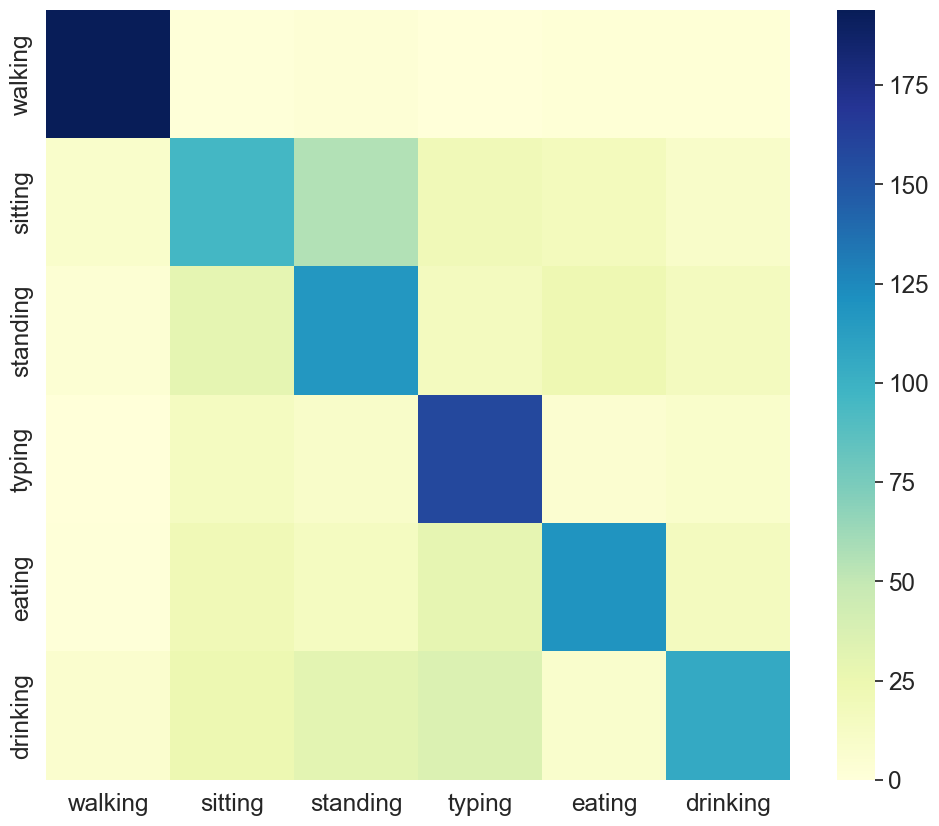

In [623]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12,10))
#sns.set(font_scale=1.6)   
_ = sns.heatmap(cm_act, cmap="YlGnBu")
#sns.heatmap(cm_act, cmap="Greens")

In [624]:
sns.set(font_scale=1.2)

In [625]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(6)],index=activity_codes_mapping.values())
accuracy_per_activity

,0
walking,0.960396
sitting,0.461538
standing,0.567961
typing,0.797980
eating,0.592040
drinking,0.500000


In [626]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.90      0.96      0.93       202
           D       0.51      0.46      0.49       208
           E       0.50      0.57      0.53       206
           F       0.61      0.80      0.69       198
           J       0.68      0.59      0.63       201
           K       0.67      0.50      0.57       212

    accuracy                           0.64      1227
   macro avg       0.65      0.65      0.64      1227
weighted avg       0.65      0.64      0.64      1227



In [627]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.6438467807660961

In [628]:
log_loss(y_test, dt_best_classifier.predict_proba(X_test))

1.2421339840002308

---
# **Random Forest Classification Model:**
---

In [629]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier

In [630]:
rf_classifier = RandomForestClassifier(**dt_model_gs.best_params_)

In [631]:
my_param_grid = {'bootstrap': [True], 
                 'n_estimators': [50, 100, 200], 
                 'oob_score': [True, False], 
                 'warm_start': [True, False]}

In [632]:
rf_model_gs = GridSearchCV(estimator = rf_classifier, 
                           param_grid = my_param_grid, 
                           scoring = 'accuracy',
                           cv = my_cv)

In [633]:
rf_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=RandomForestClassifier(criterion='entropy',
                                              min_impurity_decrease=0.007,
                                              min_samples_leaf=10,
                                              min_weight_fraction_leaf=0.01),
             param_grid={'bootstrap': [True], 'n_estimators': [50, 100, 200],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [634]:
rf_best_classifier = rf_model_gs.best_estimator_

In [635]:
rf_model_gs.cv_results_

{'mean_fit_time': array([0.45395737, 0.42135587, 0.40796828, 0.44075179, 0.86251659,
        0.8354898 , 0.84195652, 0.814221  , 1.71214051, 1.68113351,
        1.66222639, 1.6234076 ]),
 'std_fit_time': array([0.04592598, 0.00483519, 0.00415682, 0.04922418, 0.01288199,
        0.00534316, 0.05390283, 0.007112  , 0.05034314, 0.019235  ,
        0.05213172, 0.02386965]),
 'mean_score_time': array([0.00628896, 0.0063489 , 0.00603094, 0.00609026, 0.01063199,
        0.01029162, 0.01050797, 0.0103097 , 0.01842699, 0.0188365 ,
        0.0191453 , 0.0182776 ]),
 'std_score_time': array([0.00024647, 0.00016845, 0.00034173, 0.00018508, 0.00033026,
        0.0002033 , 0.00038588, 0.00037718, 0.00050469, 0.00073097,
        0.00104668, 0.00031985]),
 'param_bootstrap': masked_array(data=[True, True, True, True, True, True, True, True, True,
                    True, True, True],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, F

In [636]:
rf_best_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.007,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': True}

In [637]:
scores = cross_val_score(rf_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.7128623188405797,
 0.6947463768115942,
 0.6992753623188406,
 0.6766304347826086,
 0.7065217391304348]

<font size="4">Applying model to train set first, just to verify that there is no substantial overfitting</font>

In [638]:
y_train_pred = rf_best_classifier.predict(X_train)
#print(pd.DataFrame(y_train_pred))

In [639]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.7279151943462897

In [640]:
log_loss(y_train, dt_best_classifier.predict_proba(X_train))

0.8327037344599081

<font size="4">Applying the best rf model on the test set:</font>

In [641]:
y_test

0       F
1       E
2       D
3       A
4       A
       ..
1222    D
1223    A
1224    E
1225    F
1226    J
Name: ACTIVITY, Length: 1227, dtype: object

In [642]:
y_test_pred = rf_best_classifier.predict(X_test)
print(pd.DataFrame(y_test_pred))

      0
0     F
1     E
2     D
3     A
4     A
...  ..
1222  D
1223  A
1224  J
1225  F
1226  J

[1227 rows x 1 columns]


In [643]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
#                      y_pred=y_test_pred, normalize = 'true')
    
cm_act = pd.DataFrame(cm,
                      index=rf_best_classifier.classes_,
                      columns=rf_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

,walking,sitting,standing,typing,eating,drinking
walking,198,0,0,1,1,2
sitting,12,99,33,26,25,13
standing,5,31,105,10,41,14
typing,1,9,12,164,10,2
eating,3,11,10,21,144,12
drinking,5,11,24,16,16,140


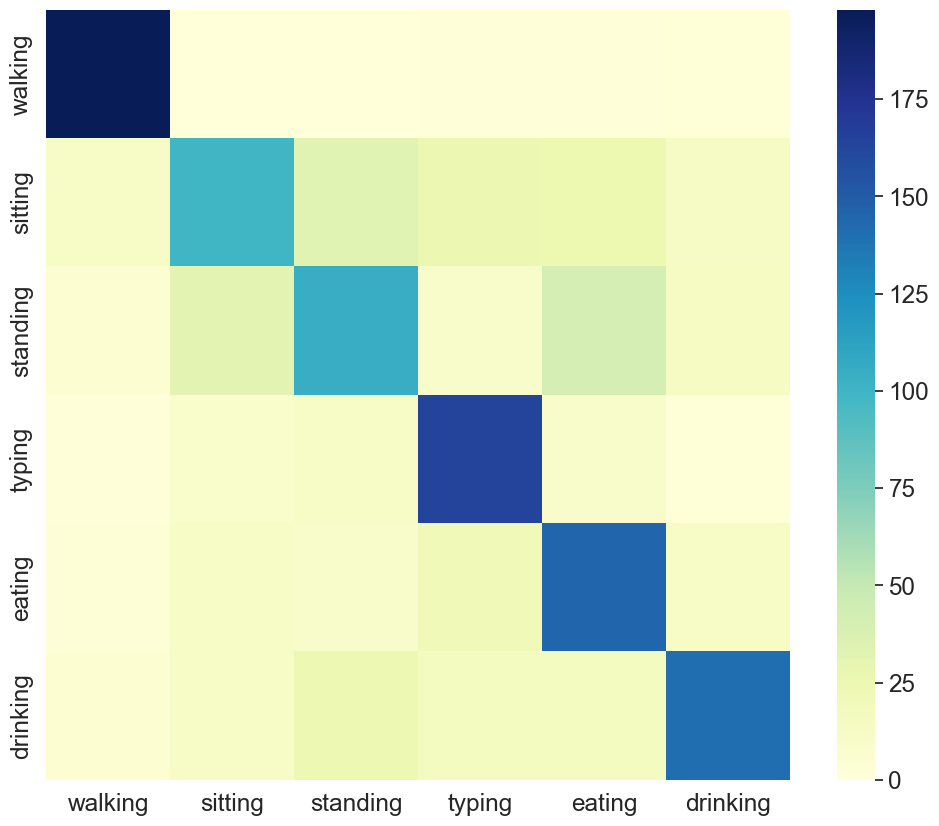

In [644]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12,10))
_ = sns.heatmap(cm_act, cmap="YlGnBu")

In [648]:
sns.set(font_scale=1.2)

In [649]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(6)],index=activity_codes_mapping.values())
accuracy_per_activity

,0
walking,0.980198
sitting,0.475962
standing,0.509709
typing,0.828283
eating,0.716418
drinking,0.660377


In [650]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.88      0.98      0.93       202
           D       0.61      0.48      0.54       208
           E       0.57      0.51      0.54       206
           F       0.69      0.83      0.75       198
           J       0.61      0.72      0.66       201
           K       0.77      0.66      0.71       212

    accuracy                           0.69      1227
   macro avg       0.69      0.70      0.69      1227
weighted avg       0.69      0.69      0.69      1227



In [651]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.6927465362673186

In [652]:
log_loss(y_test, dt_best_classifier.predict_proba(X_test))

1.2421339840002308



---

# **Logistic Regression Model:**

---



In [653]:
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')
#%matplotlib inline

In [654]:
lr_classifier = LogisticRegression(verbose = 0)

In [655]:
my_param_grid = {'C': [10, 50, 100, 200]}

In [656]:
lr_model_gs = GridSearchCV(estimator=lr_classifier, 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring = 'accuracy')

In [657]:
lr_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=LogisticRegression(),
             param_grid={'C': [10, 50, 100, 200]}, scoring='accuracy')

In [658]:
lr_best_classifier = lr_model_gs.best_estimator_

In [659]:
lr_model_gs.cv_results_

{'mean_fit_time': array([0.07680182, 0.07582378, 0.08077607, 0.07678556]),
 'std_fit_time': array([0.00758177, 0.00511084, 0.00314476, 0.00496686]),
 'mean_score_time': array([0.0024354 , 0.0020968 , 0.00188661, 0.00191488]),
 'std_score_time': array([0.00067019, 0.00016765, 0.00011037, 0.00012074]),
 'param_C': masked_array(data=[10, 50, 100, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 10}, {'C': 50}, {'C': 100}, {'C': 200}],
 'split0_test_score': array([0.62862319, 0.63677536, 0.63496377, 0.63315217]),
 'split1_test_score': array([0.63405797, 0.64492754, 0.64039855, 0.64583333]),
 'split2_test_score': array([0.62137681, 0.62952899, 0.62862319, 0.62862319]),
 'split3_test_score': array([0.64130435, 0.64402174, 0.64311594, 0.64492754]),
 'split4_test_score': array([0.66032609, 0.66847826, 0.66394928, 0.66666667]),
 'mean_test_score': array([0.63713768, 0.64474638, 0.64221014, 0.64384058]),
 'std_test_score

In [660]:
lr_best_classifier.get_params()

{'C': 50,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [661]:
scores = cross_val_score(lr_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.6494565217391305,
 0.6431159420289855,
 0.6557971014492754,
 0.6512681159420289,
 0.6530797101449275]

<font size="4">Applying model to train set first, just to verify that there is no substantial overfitting</font>

In [662]:
y_train_pred=lr_best_classifier.predict(X_train)
#print(pd.DataFrame(y_train_pred))

In [663]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.6550693123131286

In [664]:
log_loss(y_train, lr_best_classifier.predict_proba(X_train))

1.0319718134527323

<font size="4">Applying the best rf model on the test set:</font>

In [665]:
y_test

0       F
1       E
2       D
3       A
4       A
       ..
1222    D
1223    A
1224    E
1225    F
1226    J
Name: ACTIVITY, Length: 1227, dtype: object

In [666]:
y_test_pred = lr_best_classifier.predict(X_test)
print(pd.DataFrame(y_test_pred))

      0
0     J
1     E
2     D
3     A
4     A
...  ..
1222  E
1223  A
1224  F
1225  F
1226  J

[1227 rows x 1 columns]


In [667]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
 #                     y_pred=y_test_pred, normalize = 'true')
    
cm_act = pd.DataFrame(cm,
                      index=lr_best_classifier.classes_,
                      columns=lr_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

,walking,sitting,standing,typing,eating,drinking
walking,189,1,1,2,5,4
sitting,6,91,17,47,22,25
standing,4,35,78,29,32,28
typing,0,16,11,144,14,13
eating,1,7,10,15,145,23
drinking,3,10,21,25,24,129


<Axes: >

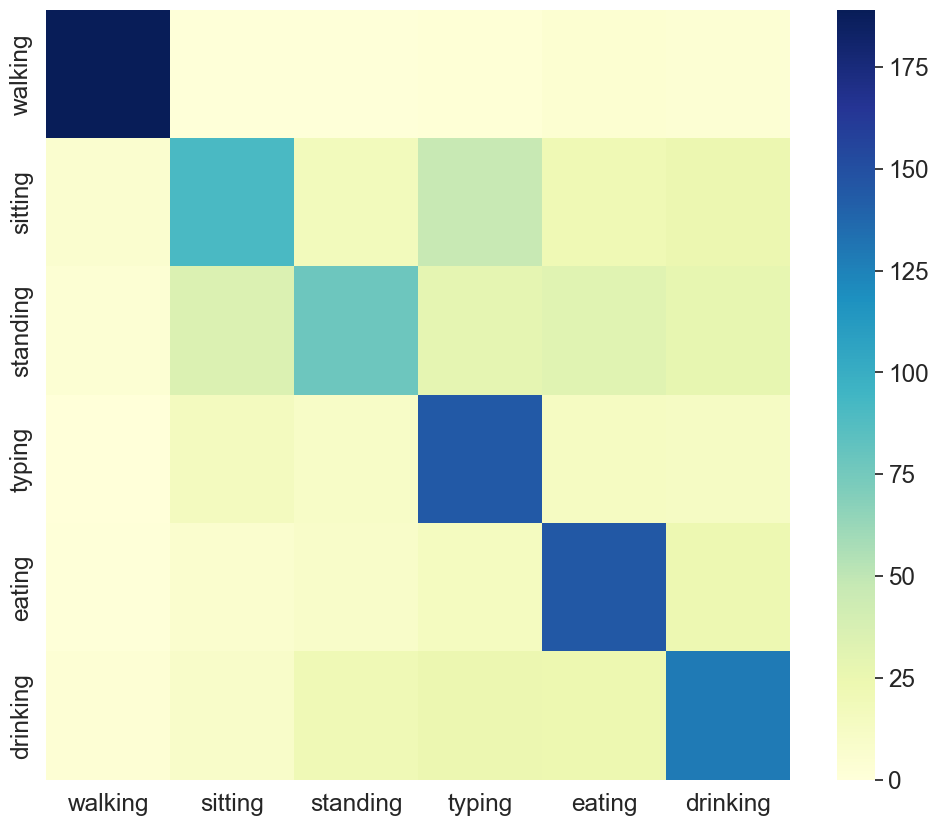

In [668]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm_act, cmap="YlGnBu")

In [669]:
sns.set(font_scale=1.2)

In [670]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(6)],index=activity_codes_mapping.values())
accuracy_per_activity

,0
walking,0.935644
sitting,0.437500
standing,0.378641
typing,0.727273
eating,0.721393
drinking,0.608491


In [671]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.93      0.94      0.93       202
           D       0.57      0.44      0.49       208
           E       0.57      0.38      0.45       206
           F       0.55      0.73      0.63       198
           J       0.60      0.72      0.65       201
           K       0.58      0.61      0.59       212

    accuracy                           0.63      1227
   macro avg       0.63      0.63      0.63      1227
weighted avg       0.63      0.63      0.62      1227



In [672]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.632436837815811

In [673]:
log_loss(y_test, lr_best_classifier.predict_proba(X_test))

1.0598170486377498



---

# **K Nearest Neighbors Model:**

---



In [674]:
from sklearn.neighbors import KNeighborsClassifier

In [675]:
knn_classifier = KNeighborsClassifier()

In [676]:
my_param_grid = {'n_neighbors': [5, 10, 20], 'leaf_size': [20, 30, 40]}

In [677]:
knn_model_gs = GridSearchCV(estimator = knn_classifier, 
                            param_grid = my_param_grid,
                            cv = my_cv, 
                            scoring ='accuracy')

In [678]:
knn_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 40], 'n_neighbors': [5, 10, 20]},
             scoring='accuracy')

In [679]:
knn_best_classifier = knn_model_gs.best_estimator_

In [680]:
print(knn_model_gs.best_params_)

{'leaf_size': 20, 'n_neighbors': 5}


In [681]:
knn_model_gs.cv_results_

{'mean_fit_time': array([0.00512981, 0.00356779, 0.00353665, 0.00353727, 0.00344768,
        0.00342631, 0.00352631, 0.00349326, 0.00337162]),
 'std_fit_time': array([1.48846570e-03, 2.19030393e-04, 1.84391110e-04, 1.96823720e-04,
        9.77636656e-05, 1.07646556e-04, 1.30797623e-04, 1.59037981e-04,
        2.15617127e-04]),
 'mean_score_time': array([0.06185541, 0.02377543, 0.02565498, 0.02348905, 0.0242691 ,
        0.02639847, 0.02280064, 0.02399945, 0.02637486]),
 'std_score_time': array([0.02327862, 0.00056333, 0.00036678, 0.00070704, 0.00034031,
        0.0003265 , 0.00064652, 0.00037858, 0.00022925]),
 'param_leaf_size': masked_array(data=[20, 20, 20, 30, 30, 30, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[5, 10, 20, 5, 10, 20, 5, 10, 20],
              mask=[False, False, False, False, False, False, False, False,

In [682]:
knn_best_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [683]:
scores = cross_val_score(knn_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.6829710144927537,
 0.6711956521739131,
 0.6594202898550725,
 0.6567028985507246,
 0.6711956521739131]

<font size="4">Applying model to train set first, just to verify that there is no substantial overfitting</font>

In [684]:
y_train_pred=knn_best_classifier.predict(X_train)
#print(pd.DataFrame(y_train_pred))

In [685]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.7548246806197336

In [686]:
#y_test

In [687]:
y_test_pred = knn_best_classifier.predict(X_test)
#print(pd.DataFrame(y_test_pred))

In [688]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
    
cm_act = pd.DataFrame(cm,
                      index = knn_best_classifier.classes_,
                      columns = knn_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

,walking,sitting,standing,typing,eating,drinking
walking,197,0,2,0,3,0
sitting,7,107,38,25,18,13
standing,4,34,103,31,23,11
typing,4,13,12,156,10,3
eating,2,11,9,29,139,11
drinking,2,10,19,45,17,119


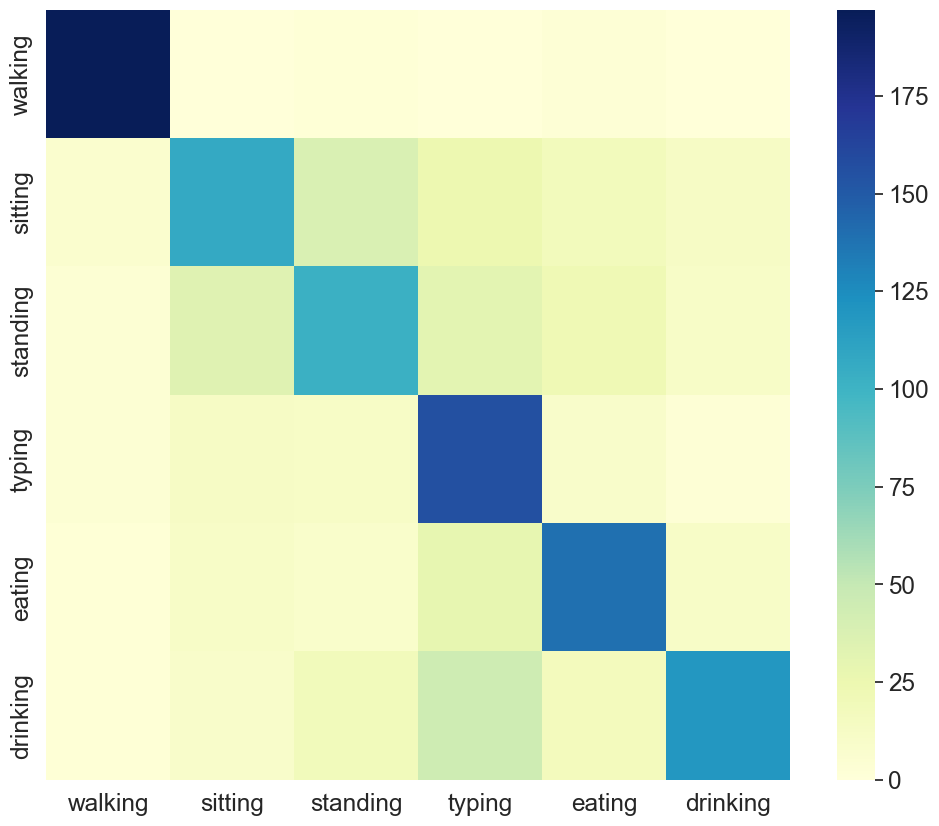

In [689]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12,10))
_ = sns.heatmap(cm_act, cmap="YlGnBu")
plt.savefig('knn_confusion_matrix.svg')

In [690]:
sns.set(font_scale=1.2)

In [691]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(6)],index=activity_codes_mapping.values())
accuracy_per_activity

,0
walking,0.975248
sitting,0.514423
standing,0.500000
typing,0.787879
eating,0.691542
drinking,0.561321


In [692]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.91      0.98      0.94       202
           D       0.61      0.51      0.56       208
           E       0.56      0.50      0.53       206
           F       0.55      0.79      0.64       198
           J       0.66      0.69      0.68       201
           K       0.76      0.56      0.64       212

    accuracy                           0.67      1227
   macro avg       0.68      0.67      0.67      1227
weighted avg       0.68      0.67      0.67      1227



In [568]:
accuracy_score(y_true = y_test, y_pred = y_test_pred)

0.8751835535976505



---

# **LSTM Model:**

---



In [448]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Flatten
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau


In [ ]:
EPOCHS_SIZE = 100
BATCH_SIZE = 1024
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001, verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=True)
# model.fit(tx, tty, validation_split=0.2, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, callbacks=[early_stopping])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE, callbacks=[reduce_lr])

---
## **Models mean prediction accuracy scores summary:**
---
Decision Tree: 0.33

Random Forest: 0.44

Logistic Regression: 0.38

KNN: 0.77

---
# **Insights & Conclusions:**
---
1) The K Nearest Neighbor classifier has prooved to provide substantial higher prediction accuracy than the rest of the models (overall mean accuracy ~0.77 on test set) in this case.

2) The analysis demonstrated typical differentiation of detection accuracy accross the various physical activities:

The highest detection accuracy is for Jogging: ~0.95
walking, stairs, kicking soccer ball, dribbling basket ball also have high accuracies: ~0.8
On the other hand, the eating related activities have lower detection accuracies: ~0.6
However, this lower accuracy is still surprisingly significant ! (10 times the neutral guess accuracy, 1/18), considering the fact that the smartphone was placed inside the participant's pants leg pocket !

3) The accuracy profiles are consistent with the visual clustering patterns seen in the three dimentional features visualization plots & t-SNE, in particular, the jogging points clusters where exceptionally noticable and distinct.

4) Possible explanations of the above observations:

The Jogging etc. where highly predictable because they where the most intense and strongly related to leg movement (the phone was inside the leg pocket)

The suprisingly significant accuracy rates of identifying eatings activites by the phone might be explained by the posture sitting changes characterizing such activities:

The fact that the accelerometer measures also the gravity vector, could supply additional implied information pertaining the orientation of the device and, therefore, as to the posture mode (standing/sitting) of the participant, which could contribute to the accuracy detection ability.

